In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import pearsonr, spearmanr

In [2]:
file = 'BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkladjustedScore_minus_avgctporportionDCadded_CSxOut.txt_cytof_fixedDCm4trfixed.txt'
orderedcells=['NaiveCD4','em4','cm4','Tregs','NaiveCD8','em8','cm8','ed8','NK','nB','mB','PC','Mono','DC']
data = pd.read_csv(file, sep='\t', index_col=0)
df = pd.DataFrame(data)

df

,Eo,Er,M0,M1,M2,Mg,Mono,NK,NaiveCD4,NaiveCD8,...,NaiveCD4_real,NaiveCD8_real,Tregs_real,cm4_real,em4_real,cm8_real,em8_real,ed8_real,PC_real,DC_real
Mixture,,,,,,,,,,,,,,,,,,,,,
healthy_NU-03-bulk-PBMC,0.024844,0.016732,0.020705,0.017688,0.017338,0.018092,0.043115,0.064246,0.075723,0.051390,...,0.1142,0.0890,0.0029,0.097,0.095,0.019,0.089,0.054,0.0002,0.0180
healthy_NU-14-bulk-PBMC,0.025710,0.017516,0.016671,0.017736,0.022433,0.016348,0.042733,0.087384,0.089255,0.088672,...,0.0783,0.0996,0.0014,0.070,0.069,0.012,0.103,0.028,0.0001,0.0130
healthy_NU-24-bulk-PBMC,0.025049,0.016297,0.020536,0.017161,0.020658,0.015092,0.047040,0.058852,0.116013,0.060992,...,0.1510,0.0863,0.0050,0.122,0.146,0.010,0.072,0.045,0.0005,0.0122
healthy_NU-31-bulk-PBMC,0.024061,0.020010,0.020680,0.018768,0.018290,0.026565,0.041409,0.107179,0.085949,0.063026,...,0.1080,0.0840,0.0012,0.069,0.099,0.008,0.073,0.049,0.0001,0.0125
healthy_NU-49-bulk-PBMC,0.026111,0.018333,0.019472,0.017671,0.017982,0.014173,0.035624,0.057370,0.095303,0.074013,...,0.0984,0.1080,0.0019,0.084,0.166,0.012,0.082,0.045,0.0001,0.0112
healthy_NU-50-bulk-PBMC,0.037755,0.016126,0.026925,0.019434,0.022748,0.021382,0.075700,0.075681,0.068829,0.042855,...,0.0620,0.0404,0.0027,0.043,0.059,0.009,0.035,0.018,0.0013,0.0175
healthy_NU-51-bulk-PBMC,0.026072,0.018020,0.025478,0.021166,0.021121,0.017117,0.071585,0.103604,0.081128,0.060595,...,0.1040,0.0520,0.0018,0.061,0.071,0.004,0.030,0.021,0.0002,0.0165


In [3]:
gt = []
est = []
for col in df.columns:
    if '_real' in col:
        gt.append(col[:-5])
    else:
        est.append(col)
        
cells = list(set(gt) & set(est))

In [4]:
pearson_dic = {}
spearman_dic = {}
for cell in cells:
    cell_arr = np.array(df[cell])
    pearson_dic[cell] = []
    spearman_dic[cell] = []
    for cell_real in cells:
        cell_real_arr = np.array(df[cell_real + '_real'])
        pearson_corr = pearsonr(cell_arr, cell_real_arr)[0]
        spearman_corr = spearmanr(cell_arr, cell_real_arr)[0]
        pearson_dic[cell].append(pearson_corr)
        spearman_dic[cell].append(spearman_corr)
        
df_pearson = pd.DataFrame.from_dict(pearson_dic, orient='index', columns=cells)
df_spearman = pd.DataFrame.from_dict(spearman_dic, orient='index', columns=cells)



In [5]:
standardnamedict={"NaiveCD4": "Naive CD4", "NaiveCD8": "Naive CD8","CD4": "Naive CD4", "CD8": "Naive CD8","mB":"Memory B cell",'Mn':'Mono','CD14':'Mono','CD19':'B Cell','nB':'Naive B cell','PC':'Plasma','cm8':'CD8 central memory','em8':'CD8 effector memory','m8':'CD8 memory','ed8':'CD8 effector','cm4':'CD4 central memory','em4':'CD4 effector memory','m4':'CD4 memory','mNeu':'PMN','Eo':'Eosinophil','Tr':'Tregs','Mg':'Megakaryocyte','Er':'Erythrocyte'}

In [6]:



df_pearson=df_pearson.reindex(orderedcells)
df_pearson=df_pearson[orderedcells]

df_spearman=df_spearman.reindex(orderedcells)
df_spearman=df_spearman[orderedcells]



df_pearson.rename(columns=standardnamedict,inplace=True)
df_pearson.rename(index=standardnamedict,inplace=True)

df_spearman.rename(columns=standardnamedict,inplace=True)
df_spearman.rename(index=standardnamedict,inplace=True)

df_pearson.head()

,Naive CD4,CD4 effector memory,CD4 central memory,Tregs,Naive CD8,CD8 effector memory,CD8 central memory,CD8 effector,NK,Naive B cell,Memory B cell,Plasma,Mono,DC
Naive CD4,0.737140,0.742734,0.776038,0.524461,0.545761,0.355894,-0.062978,0.385162,-0.347806,-0.077115,-0.040908,-0.315654,-0.567814,-0.775850
CD4 effector memory,0.411663,0.626522,0.617672,0.410846,0.502247,0.475248,0.770651,0.838965,-0.708915,-0.302660,-0.606874,-0.071211,-0.433456,-0.097202
CD4 central memory,0.731325,0.876799,0.706043,0.471826,0.417170,0.080197,-0.078604,0.394918,-0.533876,-0.094108,0.218954,-0.336938,-0.126224,-0.565521
Tregs,0.433298,0.116110,0.340963,0.821504,-0.384241,-0.405246,-0.351164,-0.247297,-0.232771,-0.574410,-0.040209,0.534641,-0.347374,-0.018962
Naive CD8,-0.034610,0.217332,0.129055,-0.403104,0.706990,0.641307,0.007496,0.050278,0.142399,0.800053,0.147501,-0.675782,-0.075849,-0.699550


In [7]:
df_pearson.to_csv(file + '_pearson.txt', sep='\t')
df_spearman.to_csv(file + '_spearman.txt', sep='\t')

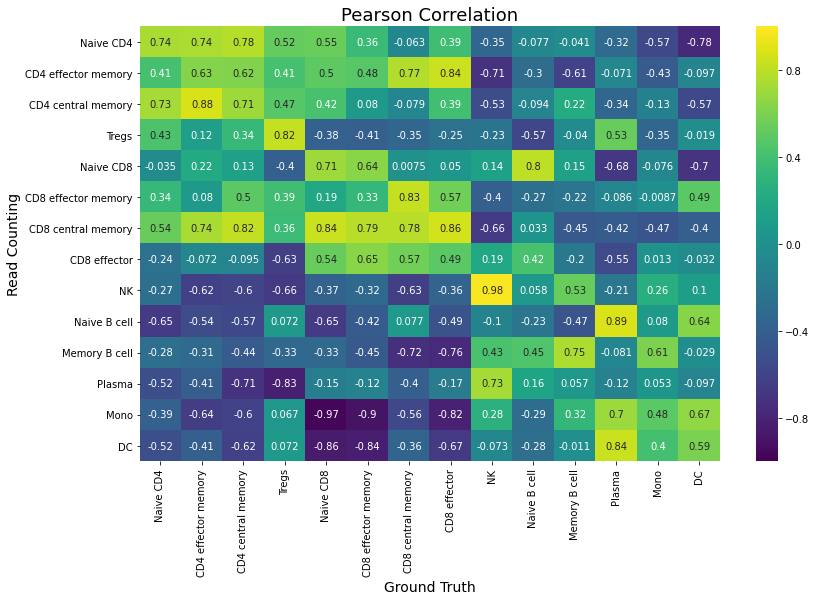

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))

sns.heatmap(df_pearson, cmap='viridis', annot=True, ax=ax, vmin=-1, vmax=1)
ax.set_xlabel('Ground Truth', fontsize=14)
ax.set_ylabel('Read Counting', fontsize=14)
ax.set_title('Pearson Correlation', fontsize=18)
plt.savefig(file + '_pearson.pdf', bbox_inches='tight')

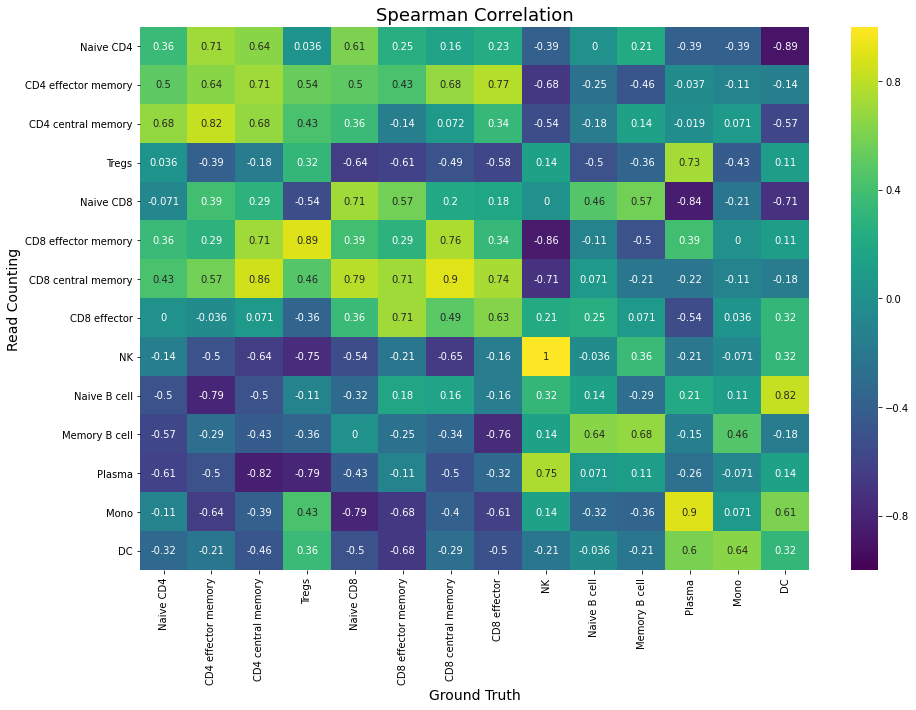

In [9]:
fig2, ax2 = plt.subplots(1, 1, figsize=(15, 10))

sns.heatmap(df_spearman, cmap='viridis', annot=True, ax=ax2, vmin=-1, vmax=1)
ax2.set_xlabel('Ground Truth', fontsize=14)
ax2.set_ylabel('Read Counting', fontsize=14)
ax2.set_title('Spearman Correlation', fontsize=18)
plt.savefig(file + '_spearman.pdf', bbox_inches='tight')